13-1 들어가며 <br>
13-2 Attention의 역사 <br>
13-3 Attention is All You Need <br>
13-4 Positional Encoding <br>
13-5 Multi-Head Attention <br>
13-6 Position-wise Feed-Forward <br>
13-7 Additional Techniques <br>
13-8 트랜스포머, 그 후엔 <br>
13-9 마무리하며 <br><br>


### 13-2 Attention의 역사
Seq2seq는 신경망 언어 모델, 특히 기계번역에 특화, 2개의 RNN을 결합한 Encoder-Decoder 구조를 만들어 문잭 전체를 반영한 번역이 가능하다. 
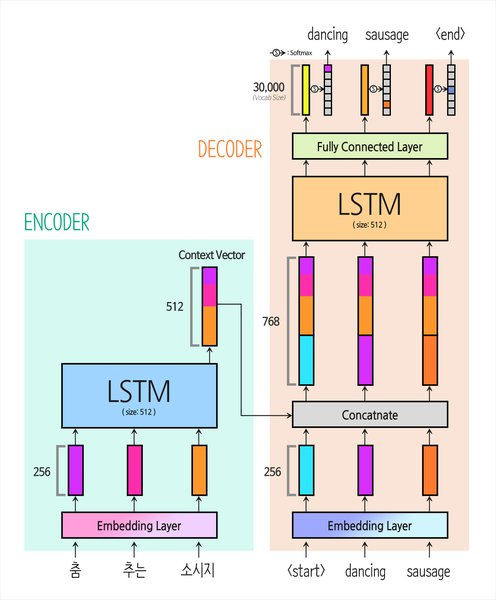 <br>

Seq2Seq에서는 LSTM을 사용한 Encoder-Decoder 구조를 채택했다. 논문에서 사용된 표현을 빌리면, Encoder에 Input Sequence x를 넣으면 고정된 크기의 <b>Representation Vector v</b>에 모든 정보를 담아 Decoder에게 전달해 주는 구조이다. Decoder는 전달받은 v를 기반으로 <b>Output</b> Sequence y를 생성한다. 추가로 v는 <b>컨텍스트 벡터(context vector)</b>라고 불리기도 한다. <br>

고정된 크기의 컨텍스트 벡터를 사용하는 것은 필연적으로 정보의 손실을 야기한다. 특히 문장이 길어지면 더더욱 손실이 커진다. 단순하게 생각해서 컨텍스트 벡터가 모든 Embedding의 평균이라 하면 3단어를 포함하는 문장과 100단어를 포함하는 문장 중 손실이 일어날 쪽은 당연히 후자이다. <br>

모든 단어를 같은 비중으로 압축하지 말고, 번역하는 데에 중요한 단어만 큰 비중을 줘서 성을 높여보자며 Dzmitry Bahdanau가 <b>Attention</b>을 제안한다. <br>

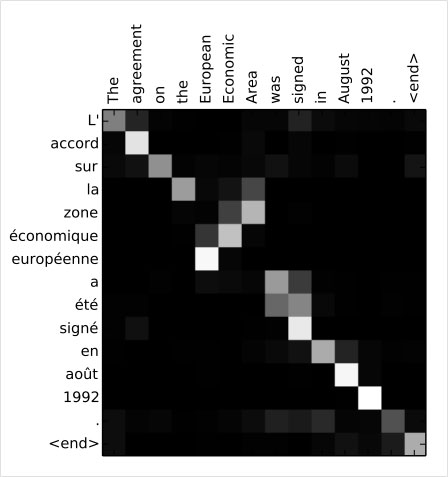<br>

Bahdanau Attention의 문제라면 T 스텝에서 Decoder의 Hidden State를 구하기 위해 T-1 스텝의 Hidden State를 사용해야 한다는 것이다. 이는 재귀적으로 동작하는 RNN에 역행하는 연산이므로 효율적이지 못했다. 이를 개선하고자 한 것이 Luong이 제안한 Attention 기법이다!<br><br>


### 13-3 Attention is All You Need!
RNN과 CNN은 고질적인 <b>기울기 소실(Vanishing Gradient)</b>은 완벽히 해결되지 않았다. 계산을 순차적으로 하는것이 양날의 검이라 단점은 <b>병렬 처리가 불가능하다</b>는 것이다. <b>트랜스포머</b>는 그야말로 신문물이었다. 논문에서는 <b>연속성이라는 개념을 과감히 배제</b>했다. 대신 Attention으로 <b>각 단어들의 상관관계를 구하는 데 집중</b>했다. <br>

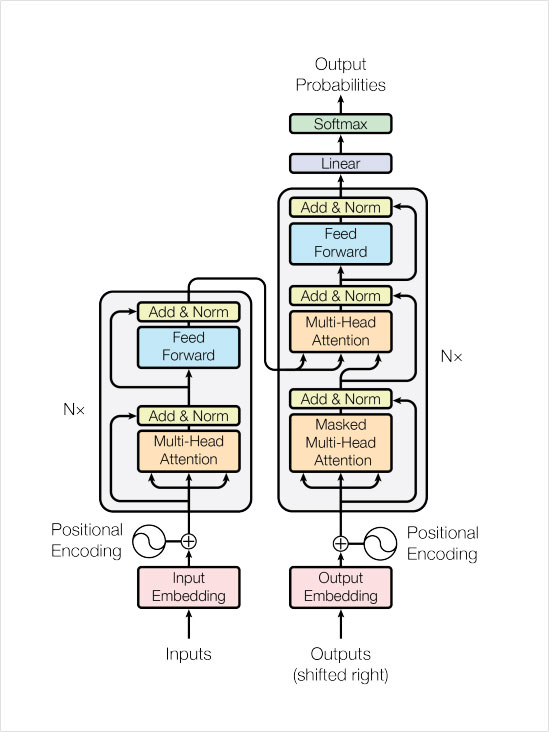 <br>
Encoder와 Decoder를 여러개 (논문에서는 6개) 쌓아올려 모델을 완성한다. 먼저 문장의 연속성을 어떻게 배제할 수 있었는지, 모델의 최하단에 위치한 <b>Positional Encoding</b>부터 차근차근 알아보도록 하겠다. <br><br>


### 13-4 Positional Encoding
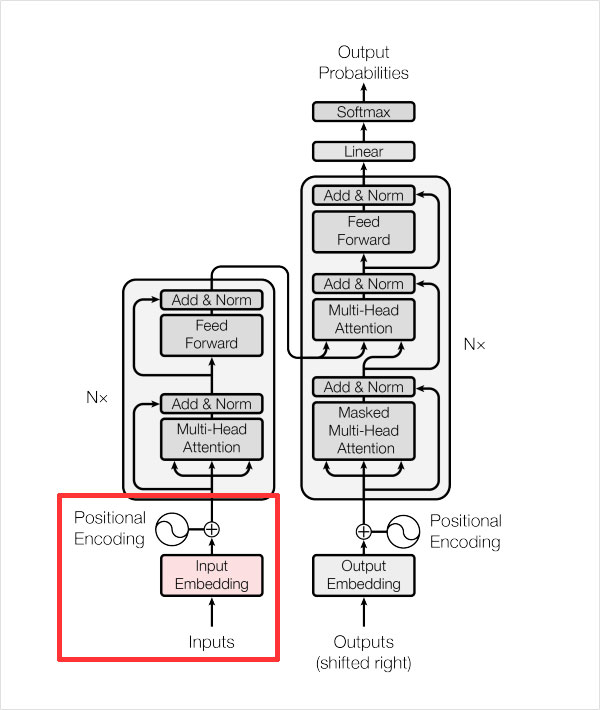 <br>
<b>Positional Encoding</b>이란 <b>문장에 연속성을 부여하는 새로운 방법</b>을 제시했다. <br>

단어 Embedding에 선형적으로 증가하는 값을 더해줬다간 <b>후에 데이터의 분포가 엉망</b>이 될 것이다. <br>
입력 시퀀스의 단어 위치 정보를 인코딩하는 데 사용된다. Transformer 모델은 입력 데이터를 처리할 때 단어의 순서 정보를 고려하지 않는다. 그러나 자연어 처리에서는 단어의 순서가 중요한 역할을 하는 경우가 많기 때문에 이를 해결하기 위해 Positional Encoding이 도입되었다. <br><br>

Q)글의 저자가 제시한 Positional Encoding의 두가지 방법과 그 한계는? <br>
각 단어에 0~1 사이의 값을 더한다. 0을 첫 번째 단어로, 1을 마지막 단어로 한다. <br>
-> 문장의 길이에 따라 더해지는 값이 가변적이다. 따라서 단어 간의 거리(Delta)가 일정하지 않다. <br>
각 단어에 선형적으로 증가하는 정수를 더한다. <br>
-> 단어 간의 거리(Delta)가 일정해지는 것은 좋지만 범위가 무제한이기 때문에 값이 매우 커질 수 있고 모델이 일반화하기 어려워진다. <br><br>


Q) Positional Encoding이 만족해야 할 4가지 조건을 적어보세요. <br>
각 Time-step마다 고유의 Encoding 값을 출력해야 한다. <br>
서로 다른 Time-step이라도 같은 거리라면 차이가 일정해야 한다. <br>
순서를 나타내는 값이 특정 범위 내에서 일반화가 가능해야 한다. <br><br>


저자들의 Positional Encoding수식은 아래와 같다. <br>
$ PE_(pos, 2i) = \sin( {pos \over 10000^{2i \over d_model}} ) $ <br><br>
$ PE_(pos, 2i+1) = \cos( {pos \over 10000^{2i \over d_model}} ) $ <br><br>

pos는 단어가 위치한 Time-step을 의미하며 i는 Encoding 차원의 Index, dmodel은 모델의 Embedding 차원 수입니다. 이를 <b>Sinusoid(사인파) Embedding</b>이라고 칭한다. 

In [ ]:
import numpy as np

def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

pos = 7
d_model = 4
i = 0

print("Positional Encoding 값:\n", positional_encoding(pos, d_model))

print("")
print("if pos == 0, i == 0: ", np.sin(0 / np.power(10000, 2 * i / d_model)))
print("if pos == 1, i == 0: ", np.sin(1 / np.power(10000, 2 * i / d_model)))
print("if pos == 2, i == 0: ", np.sin(2 / np.power(10000, 2 * i / d_model)))
print("if pos == 3, i == 0: ", np.sin(3 / np.power(10000, 2 * i / d_model)))

print("")
print("if pos == 0, i == 1: ", np.cos(0 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 1, i == 1: ", np.cos(1 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 2, i == 1: ", np.cos(2 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 3, i == 1: ", np.cos(3 / np.power(10000, 2 * i + 1 / d_model)))

직접 Positional Encoding의 1번째 열과 2번째 열을 4번째 행까지 구해보는 하드 코딩이 포함되어 있다. 혹시라도 수식의 각 요소들이 무엇을 의미하는지 와닿지 않는다면 소스를 분석하며 이해해 보자!

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.imshow(positional_encoding(100, 300), cmap='Blues')
plt.show()

<b>Positional Embedding</b> 기법도 제안. 수식적으로 계산한 Position 값이 아니라 Position에 대한 정보를 담은 Embedding 레이어를 선언하여 위치에 대한 정보를 학습할 수 있게 한 것이다. 그림으로 표현하면 다음과 같다. <br>
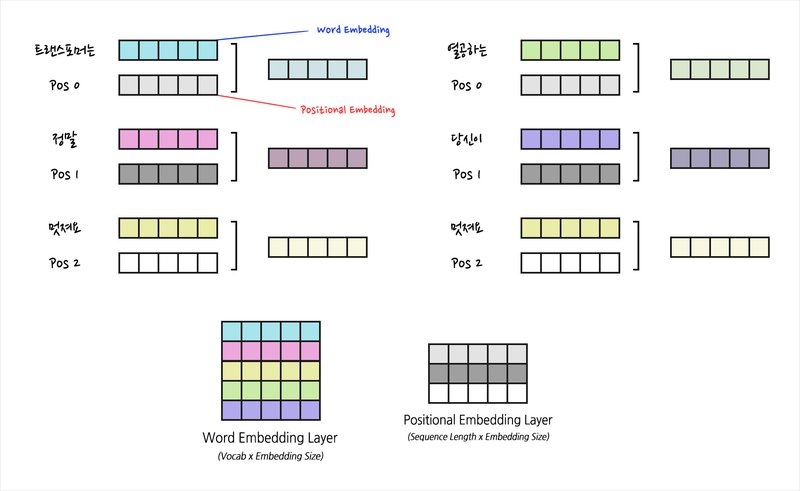 <br>

Positional Embedding이 훈련 중 값이 변한다고 하더라도 그것은 <b>모든 문장에 대해 동일하게 적용되기에</b> 문제가 되지 않습니다. 오히려 Sinusoid Embedding보다 <b>적합한 값이 학습될 것을 기대할</b> 수도 있다. <br>

두 방법 모두 거의 동일한(±0.1 BLEU) 결과를 보였으며, 저자들은 길이가 길어져도 부담이 없는 Sinusoid Embedding을 채택하였습니다. Positional Embedding은 문장의 길이만큼 Embedding Table의 크기가 커지니까요. Positional Embedding은 추후에 <b>BERT</b>라는 모델에 적용되어 성능이 높아진다. <br>


### 13-5 Multi-Head Attention
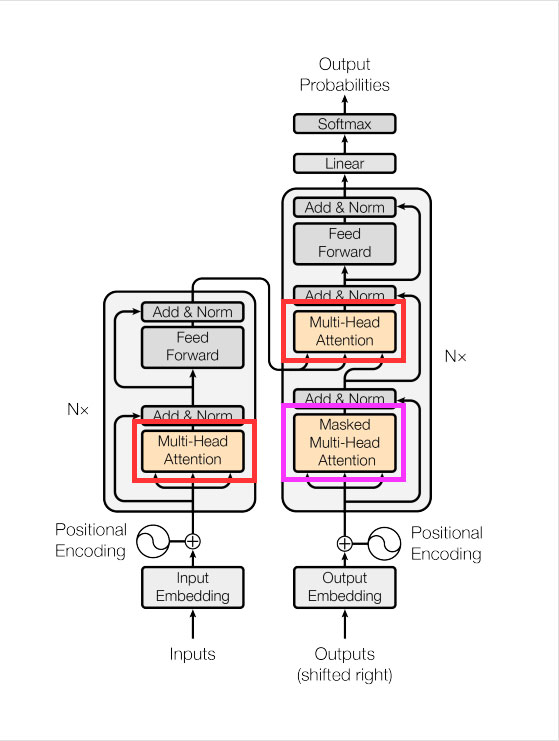 <br>
위 그림에서 보라색으로 표시된 Masked Multi-Head Attention은 Multi-Head Attention과 동일하지만 <b>인과 관계 마스킹(Causality Masking)</b> 이라는 과정이 하나 더 추가됐다. Multi-Head Attention 모듈은 Linear 레이어와 Scaled Dot-Product Attention 레이어로 이뤄진다. <br>
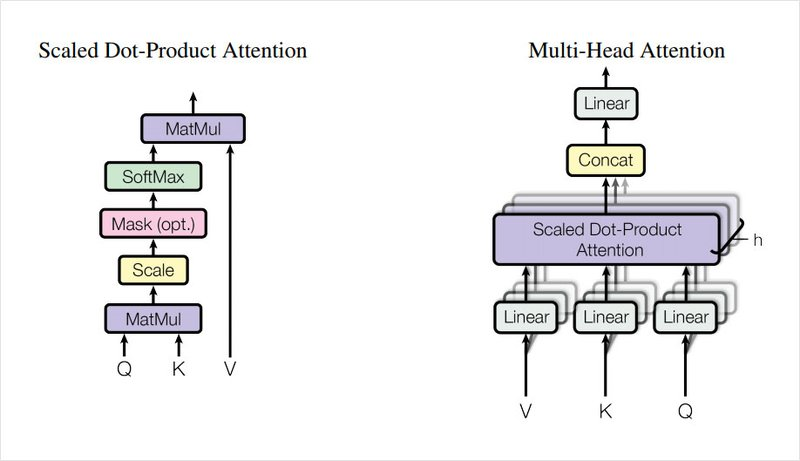 <br>

<b>Scaled Dot-Product Attention</b> <br>
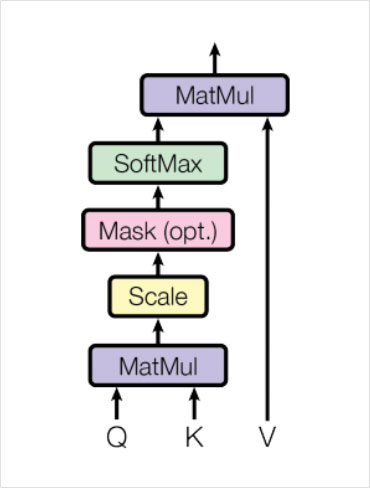<br>
먼저 Scaled Dot-Product Attention에 대해 배워보겠다. 트랜스포머 논문 원문을 처음 읽게 될 때 맞닥뜨리게 되는 어려움 중 하나는, 수식도 이해되고 네트워크 구조도 이해할 수 있음에도 불구하고 그 의미가 직관적으로 잘 와닿지 않는다는 점이다. 특히 그중에서도 위 그림에 나오는 Q(query), K(key), V(value)가 어떤 의미를 가지고 있는지 특별한 설명이 없다는 점이다. 이 3가지의 의미는 오히려 후속 연구들을 통해 더욱 구체적으로 밝혀지고 있는데, 어쩌면 지금 이 시점까지도 계속 새롭게 그 의미가 드러나고 있다고도 할 수 있다.<br>

Scaled Dot-Product Attention도 결국 그때까지 나왔던 attention 개념의 연장선이었음을 떠올려 보자. 그래서 이해를 돕기 위해 이전 시간에 다루어 보았던 Bahdanau attention 개념과 나란히 놓고 비교해 보겠다. <br>

seq2seq 인코더-디코더 구조에서 attention이란 바로 디코더의 포지션 i에서 바라본 인코더의 context vecotr ci를 해석하기 위해, 인코더의 각 포지션 j에 부여한 가중치였다. 이 가중치는 디코더의 state $s_i$ 와 state $h_j$ 사이의 유사도를 통해 계산되었다.<br> 

원리는 동일하다. 단지 디코더의 state를 Q(query)라고 부르고, 인코더의 state를 K(key)라고 추상화한 것이다. 그래서 Q와 K의 유사도를 dot product로 계산하여 $ softmax( {QK^T \over \sqrt d_k} ) $를 attention 가중치로 삼고, 이것으로 V(value)를 재해석 준 것이다. <br> 

( __cf) $d_k$는 dimension을 가지는 queries와 keys, 그리고 $d_v$ dimension을 가지는 values로 구성된다. 우선 하나의 query에 대해 모든 key들과 dot product를 한 뒤 각 값을 $ \sqrt d_k $로 나눠준다. 그리고 softmax함수를 씌운 후 마지막으로 value를 곱하면 attention 연산이 끝난다. 실제로 계산할때는 query, key, value를 vector하나하나 계산하는 것이 아니라 여러개를 matrix로 만들어 계산한다. 그렇게 해서 만들어준 수식이  $ softmax( {QK^T \over \sqrt d_k} $ 이다__)


하나 다른 점은, 인코더 쪽에서 $h_j$ 하나만 존재했던 것이 K와 V, 2가지로 분화되었다는 점이다. <br>
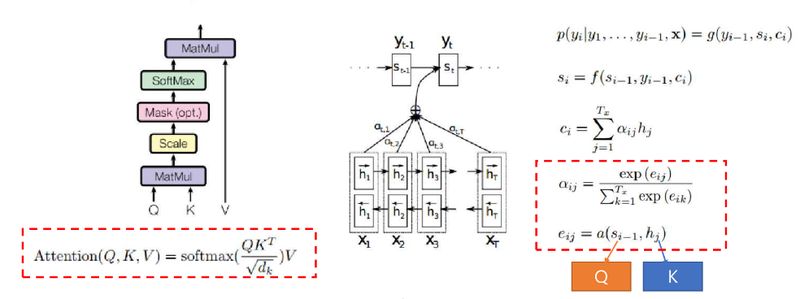 <br>
Attention (Q, K, V)와 오른쪽 그림의 $c_i$ 가 실은 같은 형태이며, $softmax( {QK^T \over \sqrt d_k} )$ 와 $a_{i,j}$가 같은 역할을 하고 있다. <br><br><br>


${1 \over \sqrt d_k}$: Scaled Dot-Product Attention은 <b>Additive(합 연산 기반) Attention</b>과 <b>Dot-Product(-Multiplicative, 곱 연산 기반) Attention</b> 중 후자를 사용한 Attention이고, 차원수가 깊어짐에 따라 Softmax 값이 작아지는 것을 방지하기 위해 Scale과정을 포기했다. 이 과정을 본떠 <b>Scaled Dot-Prodjct Attention</b> 이라고 이름이 붙여진 것이다. <br>

__참고)https://reniew.github.io/43/__

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)

length = 30
big_dim = 1024.
small_dim = 10.

big_tensor = make_dot_product_tensor((length, int(big_dim)))
scaled_big_tensor = big_tensor / tf.sqrt(big_dim)
small_tensor = make_dot_product_tensor((length, int(small_dim)))
scaled_small_tensor = small_tensor / tf.sqrt(small_dim)

fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.set_title('1) Big Tensor')
ax2.set_title('2) Big Tensor(Scaled)')
ax3.set_title('3) Small Tensor')
ax4.set_title('4) Small Tensor(Scaled)')

ax1.imshow(tf.nn.softmax(big_tensor, axis=-1).numpy(), cmap='cividis')
ax2.imshow(tf.nn.softmax(scaled_big_tensor, axis=-1).numpy(), cmap='cividis')
ax3.imshow(tf.nn.softmax(small_tensor, axis=-1).numpy(), cmap='cividis')
ax4.imshow(tf.nn.softmax(scaled_small_tensor, axis=-1).numpy(), cmap='cividis')

plt.show()

모두 같은 범위인 [-3, 3]에서 랜덤 Tensor를 만들어 실제 Attention을 하듯 Dot-Product를 하고, Softmax를 취했다. 위 히트맵에서 어두운 부분으로는 <b>미분 값(Gradient)</b>이 흐르기 어렵기 때문에 모델이 넓은 특성을 반영할 수 없게 된다. 즉, 히트맵이 <b> 선명할수록 모델의 시야가 편협해진다</b>고 이해하면 된다. <br><br>


<b>인관 관계 마스킹(Casuality Masking)</b>

Sequence-to-sequence 모델을 훈련할 때에 Decoder의 첫 입력으로 <start> 토큰이 들어갔었다. 그럼 Decoder는 컨텍스트 벡터로 압축된 입력 문장과 <start> 토큰만을 단서로 첫 번째 단어를 생성해야 한다. 그 다음 스텝도 같은 단서에 추가로 방금 Decoder 본인이 생성한 첫 번째 단어를 포함하여 두 번째 단어를 생성한다. 이 같은 특성을 자기 회귀(Autoregressive)라 칭한다. 자기 자신을 입력으로 하여 자기 자신을 예측하는 것이다. <br>

하지만 트랜스포머는 모든 단어를 병렬적으로 처리하기에 <b>자기 회귀적인 특성을 잃어버린다</b>. 이는 곧 문장을 생성할 수 없다는 의미이고, 쓸모가 없다는 의미이다. <br>

이에 저자들이 자기 회귀적인 특성을 살리기 위해 추가한 것이 바로 <b>인과 관계 마스킹(Causality Masking)이다</b>. 인과 관계 마스킹은 목표하는 문장의 일부를 가려 <b>인위적으로 연속성을 학습</b>하게 하는 방법입니다. 다음 그림과 같다. <br>

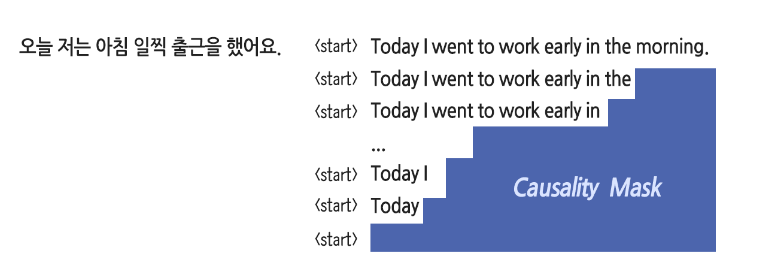 <br>
위와 같은 과정을 거치면 모든 Time-Step에 대한 입력을 한 번에 처리하면서 <b>자기 회귀적인 특성도 유지</b>하게 됩니다. 테스트 시 소스 문장을 Encoder에 전달하고 타겟 문장은 <start>만 넣더라도 모델이 <start> 토큰만 보고 문장을 생성한 적(위 그림의 마지막 Step)이 있기 때문에 첫 번째 단어를 생성해낼 수 있고, 생성된 단어는 다시금 입력으로 전달되어 그야말로 <b>자기 회귀적으로 문장을 생성</b>하게 됩니다. <br>

이러한 연유로 인과 관계 마스크는 대각항을 포함하지 않는 <b>삼각 행렬</b>의 모양새를 갖는다. 입력 문장만을 보고 첫 번째 단어를 생성하는 것은 타겟 문장을 모두 가리는 것이 타당하니 대각항을 포함하는 게 맞지만, 그럴 경우 Attention 값을 구하는 과정에서 마지막(혹은 첫 번째) 행이 0개 요소에 대해 Softmax를 취하게 되므로 오류를 야기한다. 따라서 <start> 토큰을 활용해 마스크가 대각항을 포함하지 않는 형태가 되게끔 만든 것이다. <br>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)

def generate_causality_mask(seq_len):
    mask = 1 - np.cumsum(np.eye(seq_len, seq_len), 0)
    return mask

sample_tensor = make_dot_product_tensor((20, 512))
sample_tensor = sample_tensor / tf.sqrt(512.)

mask = generate_causality_mask(sample_tensor.shape[0])

fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('1) Causality Mask')
ax2.set_title('2) Masked Attention')

ax1.imshow((tf.ones(sample_tensor.shape) + mask).numpy(), cmap='cividis')

mask *= -1e9
ax2.imshow(tf.nn.softmax(sample_tensor + mask, axis=-1).numpy(), cmap='cividis')

plt.show()

좌측은 실제 마스크의 형태, 우측은 마스킹이 적용된 Attention이다. 마스킹은 <b>마스킹 할 영역을 -∞</b>로 채우고 <b>그 외 영역을 0</b>으로 채운 배열을 Dot-Product된 값에 더해주는 방식으로 진행된다. 후에 진행될 Softmax는 큰 값에 높은 확률을 할당하는 함수이므로 -∞로 가득 찬 마스킹 영역에는 무조건 0의 확률을 할당하게 된다. <br><br>


<b>Multi-Head Attention</b><br>
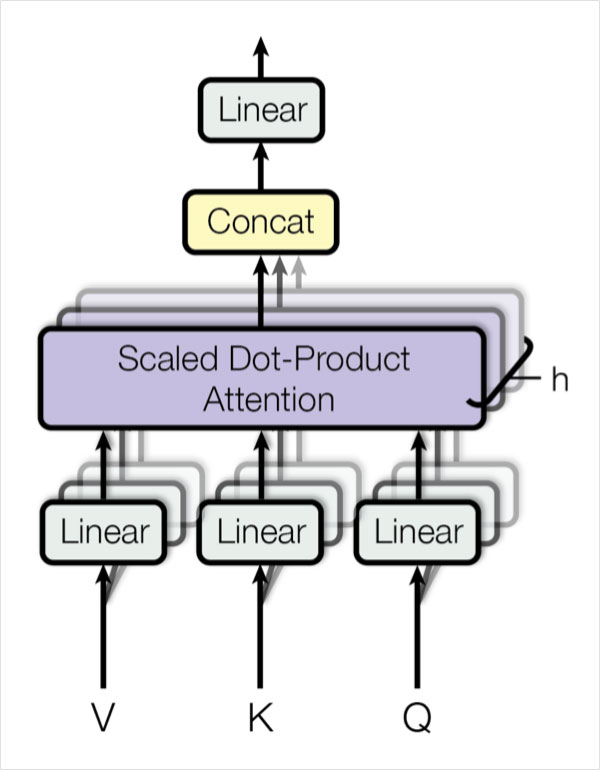 <br>

일전에 Embedding이 어떤 추상적인 속성을 담고 있다고 배웠었다. Multi-Head Attention은 그 개념을 활용해서 이해를 하면 아주 쉽다. <br>

예를 들면 바나나라는 단어가 512차원의 Embedding을 가진다고 가정해보자. 그중 64차원은 노란색에 대한 정보를 표현하고, 다른 64차원은 달콤한 맛에 대한 정보를 표현할 것이다. 같은 맥락으로 바나나의 형태, 가격, 유통기한까지 모두 표현될 수 있겠다. 저자들은 '이 모든 정보들을 섞어서 처리하지 말고, 여러 개의 Head로 나누어 처리하면 <b> Embedding의 다양한 정보를 캐치</b>할 수 있지 않을까?' 라는 아이디어를 제시한다. <br>
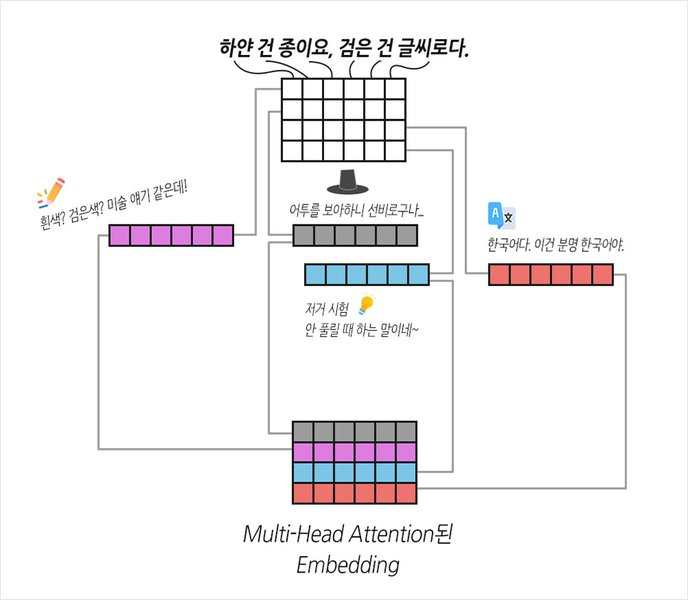 <br>

Multi-Head Attention에서 <b>Head는 주로 8개</b>를 사용한다. Embedding된 10개 단어의 문장이 [10, 512]의 형태를 가진다면, Multi-Head Attention은 이를 [10, 8, 64]로 분할하여 연산한다. 각 64차원의 Embedding을 독립적으로 <b>Attention</b>한 후, 이를 이어붙여 다시금 [10, 512]의 형태로 되돌리며 연산은 끝이 난다. <br>

하지만 쪼개진 64차원이 연관있는 것들끼리 묶여있을 거란 보장은 없다. 다시 말해, Head로 쪼갠 Embedding들끼리 유사한 특성을 가진다는 보장이 없기 때문에 앞단에 Linear 레이어를 추가해 주는 것이다. Linear 레이어는 데이터를 특정 분포로 매핑 시키는 역할을 해주기 때문에, 설령 단어들의 분포가 제각각이더라도 Linear 레이어는 Multi-Head Attention이 잘 동작할 수 있는 적합한 공간으로 Embedding을 매핑한다. <br>

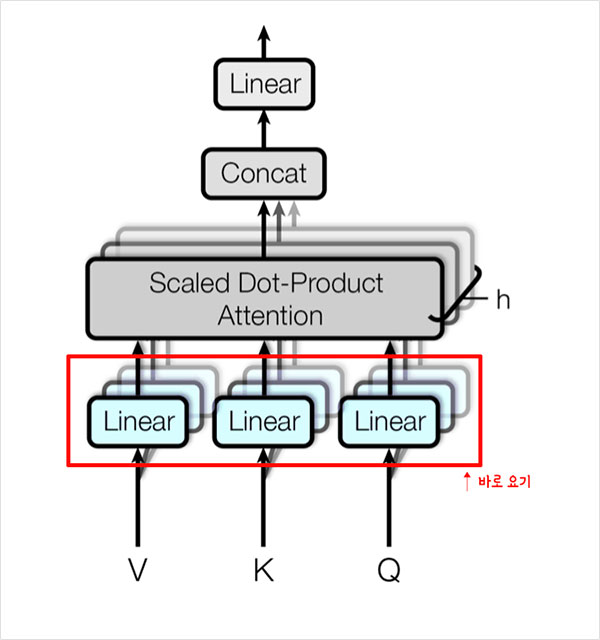 <br>
비슷한 이유로 각각의 Head가 Attention 한 값이 균일한 분포를 가질 거란 보장이 없다. 따라서 모든 Attention 값을 합쳐준 후, 최종적으로 Linear 레이어를 거치며 비로소 Multi-Head Attention이 마무리가 된다. <br><br>


### 13-6 Position-wise Feed-Forward Networks
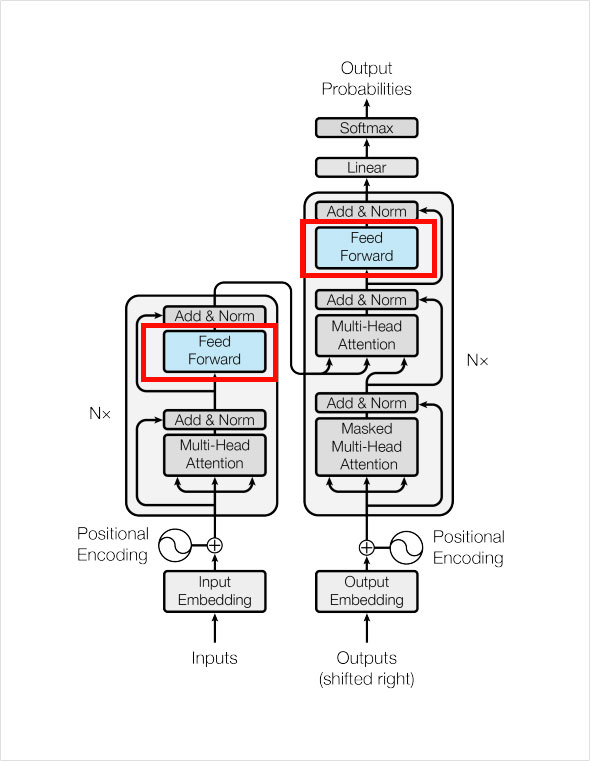 <br>

<b>W</b>는 Linear 레이어를 의미하고, <b>max(O, x)</b> 함수는 활성 함수 ReLU이다. https://pozalabs.github.io/transformer/ <br>
<b>커널 사이즈가 1인 Convolution을 두번 연산한 것과 동일하다고 하는 부분</b>일거라 예상
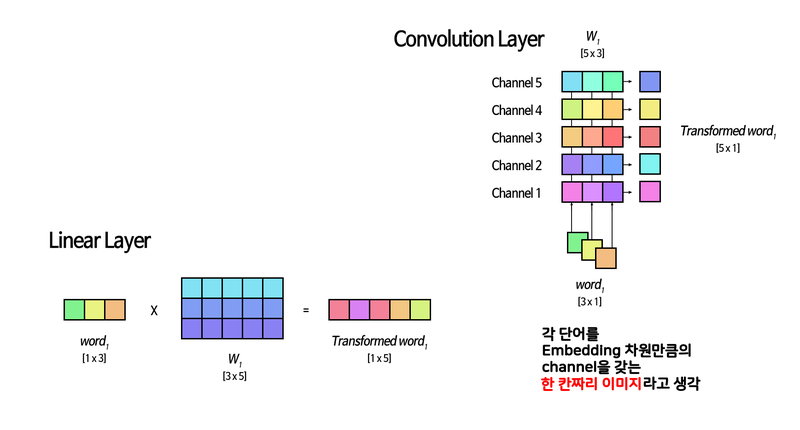 <br>
    
한 단어를 Embedding 차원만큼의 채널을 갖는 이미지라고 취급한다고 생각하면 될 듯. Convolution 레이어의 Weight는 [입력 차원 수 X 출력 차원 수 X 커널의 크기] 이므로 커널의 크기가 1이라면 Linear 레이어와 동일한 크기의 Weight를 갖게 됨. <br>

최근에는 구글에서 AI를 만드는 AI, AutoML을 활용해 최적의 트랜스포머 구조를 찾아내기도 했다. <b>진화된 트랜스포머(Evolved Transformer)</b>는 두 층의 레이어 중 아래층 레이어에서 차이를 보이는데, 이때 Linear 레이어를 Convolution 레이어로 표기하는 방식을 택한다. <br>
https://ai.googleblog.com/2019/06/applying-automl-to-transformer.html <br><br>


### 13-7 Additional Techniques
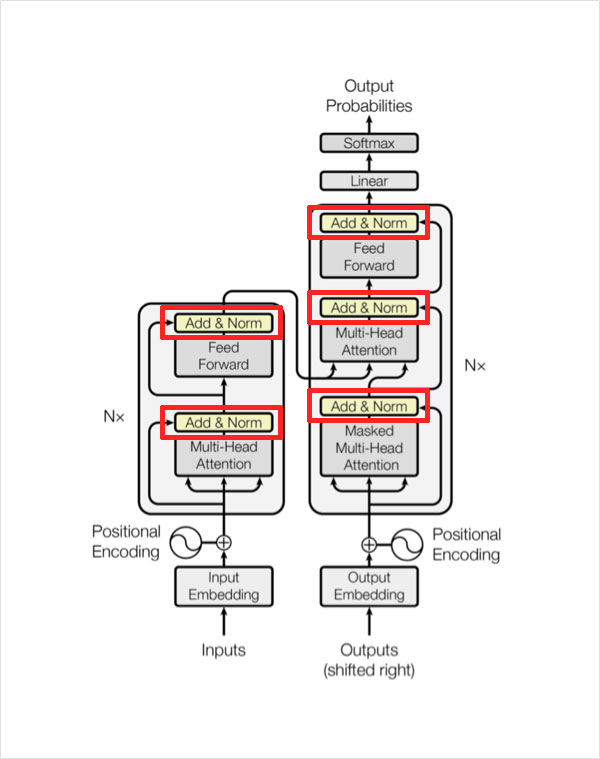 <br>

<b>Layer Normalization</b> <br>
Layer Normalization은 데이터를 Feature 차원에서 정규화를 하는 방법이다. 또 다시 10단어의 Embedding된 문장을 예로 [10, 512]에서 512차원 Feature를 정규화하여 분포를 일정하게 맞춰주는 것이다. Layer Normalization 외에도 다양한 Normalization 방법이 있고, 약간 논외지만 Regularization과 Generalization 등 우리를 헷갈리게 하는 많은 방법들이 있다. <br><br>


<b>Residual Connection</b> <br>
Skip Connection이라고도 부르는 Residual Connection이 처음 제안된 것은 2015년 ResNet이라는 모델과 같이 제안.
https://itrepo.tistory.com/36 <br><br>


<b>Learning Rate Schedular</b> <br>
트랜스포머를 훈련하는 데에는 Adam Optimizer를 사용했는데, 특이한 점은 Learning Rate를 수식에 따라 변화시키며 사용했다는 것.
$ lrate = d_model^-0.5 \cdot min(step_num^-0.5, step_num \cdot warmup_steps^-1.5) $ <br>

warmup_step까지는 lrate가 <b>선형적으로 증가</b>하고, 이후에는 step_num에 비례해 <b>점차 감소하는 모양새</b>를 보이게 된다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

d_model = 512
warmup_steps = 4000

lrates = []
for step_num in range(1, 50000):
    lrate = (np.power(d_model, -0.5)) * np.min(
        [np.power(step_num, -0.5), step_num * np.power(warmup_steps, -1.5)])
    lrates.append(lrate)

plt.figure(figsize=(6, 3))
plt.plot(lrates)
plt.show()

Learning Rate를 사용하면 <b>초반 학습이 잘되지 않은 상태에서의 학습 효율</b>이 늘어나고, 어느 정도 학습이 된 후반에는 <b>디테일한 튜닝</b>을 통해 Global Tuning을 찾아가는 효과가 나게 된다. <br><br>


<b> Weight Sharing </b> <br>
Weight Sharing은 모델의 일부 레이어가 동일한 사이즈의 Weight를 가질 때 종종 등장하는 테크닉이다. <b>하나의 Weight를 두개 이상의 레이어가 동시에 사용</b>하도록 하는 것인데, 대표적으로 언어 모델의 Embedding레이어와 최종 Linear 레이어가 동일한 사이즈의 Weight를 가진다. 프로그래밍 개념 중 'Call By Reference'와 비슷한 느낌이다. <br>

ResNet이 증명한 것처럼 <b>많은 Weight가 곧 성능으로 이어지지 않고</b>, 외려 <b>Optimization에서 불리한 경향</b>을 보인다. 실제로 Weight Sharing은 튜닝해야할 파라미터 수가 감소하기 때문에 학습에 더 유리하며 자체적으로 Regularization 되는 효과도 있다. 유연성이 제한되어 과적합을 피하기 용이해진다. <br>

트랜스포머에선느 <b>Decoder의 Embedding 레이어와 출력층 Linear 레이어</b>의 Weight를 공유하는 방식을 사용했다. 소스 Embedding과 타겟 Embedding도 논문상에서는 공유했지만 이는 언어의 유사성에 따라서 선택적으로 사용한다. 만일 소스와 타겟 Embedding 층까지 공유한다면 3개의 레이어가 동일한 Weight를 사용하는 셈이다. <br>

또한 출력층 Linear 레이어와 Embedding 레이어의 Feature 분포가 다르므로 Embedding 된 값에 $ d_moel $의 제곱근 값을 곱해준다. 이는 분포를 맞춰줌과 동시에 Positional Encoding이 Embedding 값에 큰 영향을 미치는 것을 방지해 준다.


### 13-8 트랜스포머, 그 후엔
트랜스포머를 기반으로 발전한 큰 줄기들은 BERT와 GPT <br>
BERT와 GPT의 다른점) <br>
- BERT는 트랜스포머에서 인코더, GPT는 트랜스포머에서 디코더만 취해 사용한다는 점이 다르다.
- GPT는 단방향 Attention을 사용하지만 BERT는 양방향 Attention을 사용한다.
- GPT는 문장을 생성할 수 있지만 BERT는 문자으이 의미를 추출하는 데 강점을 가지고 있다. 

<b> 문단의 문맥을 파악하는 </b> 수준까지의 보다 긴 입력 길이를 처리할 수 있도록, 기존의 트랜스포머에 Recurrence라는 개념을 추가한 <b>Transformer-XL</b>이 제안되기도 했다. <br>

https://comeng.tistory.com/entry/Transformer-XL-%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%AC-%EB%B0%8F-%EC%84%A4%EB%AA%85%EC%9A%94%EC%95%BD 참고 <br>
Transformer의 한계: <br>
1) Attention <br>
- N Encoder Decoder이다, Context Vector 하나만을 생성하여 순차적으로 Decoding한다. <br>
- 어텐션은 다른 단어의 인코딩 Hidden State를 활용한다. <br>
- 디코딩할 때 인코딩에서 받은 Hideen State를 활요ㅇ하여 어텐션을 계산하고 이를 Weighted Sum하여 활용 <br>
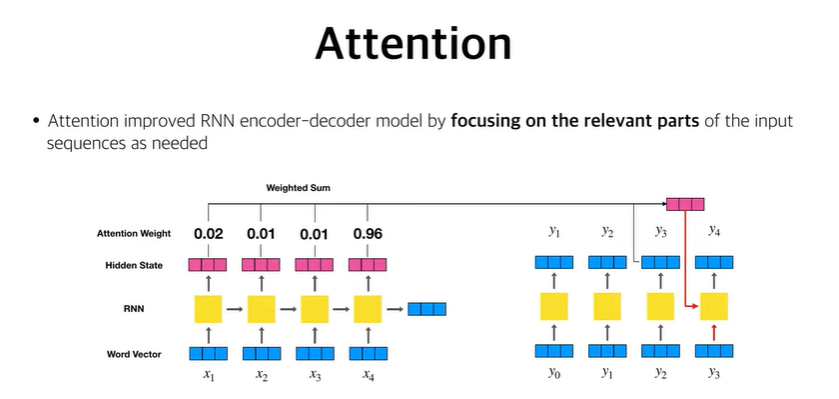 <br>
=> 기존 RNN보다 훨씬 좋지만, 이전 결과를 다음 결과를 위해 사용하므로 느리다(sequential)는 RNN의 단점이 남아있다. <br>


2) Transforemr <br>
어텐션의 장점을 사용하되 RNN을 사용하지 않는다. <br>
Self-Attention을 병렬적, 계층적으로 여러 겹 쌓아 속도와 성능을 옾인 모델이다. 
장점) 
- 어텐션 스코어를 시각화하여 키워드 간의 열결, 어텐션 관계를 알 수 있다. 
주어진 

지금에서는 모델 성능이 극대화되어 성능을 높이고자 하는 연구보단 연산량을 줄이고자 하는 연구가 늘고 있다. <br>
<b>Reformer</b> 는 트랜스포머를 <b>연산량 측면에서 혁신적으로 개선</b>한 모델이다. <br>
https://brunch.co.kr/@synabreu/31 <br>


"Multi-Head Attention에서 모든 Head가 과연 필요한가?"라는 주장이 있다. <br>
- https://www.facebook.com/permalink.php?story_fbid=156092245822648&id=111809756917564 <br>
- https://littlefoxdiary.tistory.com/m/66?category=847374 <br>

이 외에도 <b>XLNet, ELECTRA, RoBERTa, GPT-3, </b> 